# Classification

We will use classification methods to see if classification based on brain strucutres improve after subtyping. We used an SVM with 5-fold cross-validation, class-weithing and threshold tuning.

In [1]:
import os
os.chdir('/Volumes/methlab/Students/Jente/Scripts_ASD_paper/python_scripts/SVM')

import pandas as pd
import numpy as np

# Import functions
from utils import SVM


In [2]:
# Load data for classification with subgroups and TC
Data = pd.read_csv('/Volumes/methlab/Students/Jente/Scripts_ASD_paper/python_scripts/SVM/Data.csv')

# Filter data so we have two dataframes with only subgroup 1 and TC or only subgroup 2 and TC
Data1 = Data[(Data["classification_model"] == 1) | (Data["classification_model"] == 0)]

Data2 = Data[(Data["classification_model"] == 2) | (Data["classification_model"] == 0)]
Data2.loc[Data2["classification_model"] == 2, "classification_model"] = 1
Data2 = Data2.sort_values("classification_model", ascending = False)


Data1and2 = Data[Data['classification_model'].isin([1, 2])]
Data1and2.loc[Data1and2["classification_model"] == 2, "classification_model"] = 0
Data1and2 = Data1and2.sort_values("classification_model", ascending = False)


## Create features and target data

x1 = np.array(Data1.iloc[:,7:-1])
y1 = np.array(Data1["classification_model"])


x2 = np.array(Data2.iloc[:,7:-1])
y2 = np.array(Data2["classification_model"])


In [3]:
# Load data for classification without subgroups
DataTC = pd.read_csv('/Volumes/methlab/Students/Jente/Scripts_ASD_paper/python_scripts/SVM/Data.csv')

#Change all 1 and 2 to 1 for ASD
DataTC['classification_model'] = DataTC['classification_model'].replace({2: 1})


## Create features and target data

xTC = np.array(DataTC.iloc[:,7:-1])
yTC = np.array(DataTC["classification_model"])


## Run SVM

In [4]:
# Set which kernel want to use
kernel = "rbf"

Optimal decision threshold: 0.30
Precision: 0.48
Recall: 0.81
Balanced accuracy: 0.64
Accuracy: 0.60
ROC AUC: 0.70


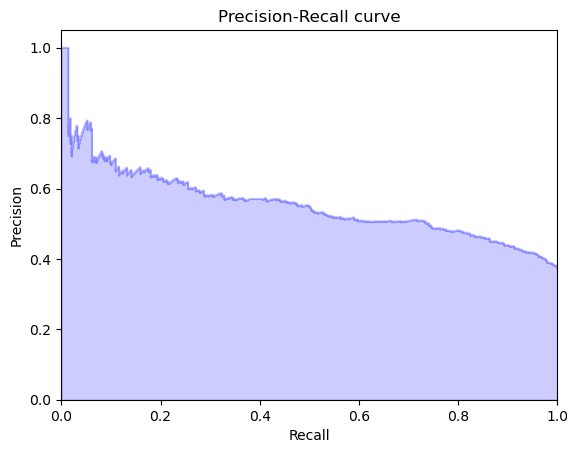

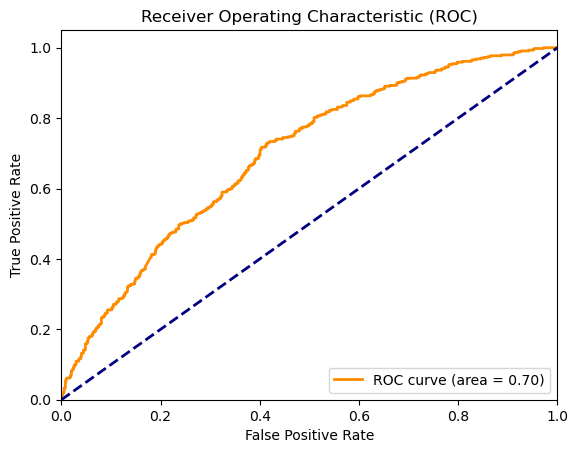

In [5]:
# Classification all autism and TCs
SVM(xTC,yTC, kernel = kernel, C=1, cv = 5)


Optimal decision threshold: 0.16
Precision: 0.25
Recall: 0.50
Balanced accuracy: 0.64
Accuracy: 0.74
ROC AUC: 0.70


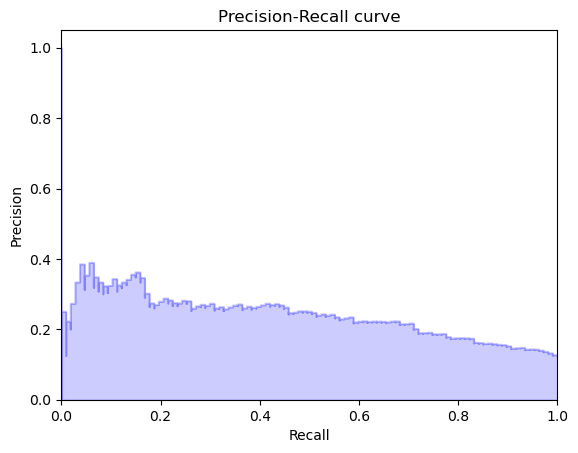

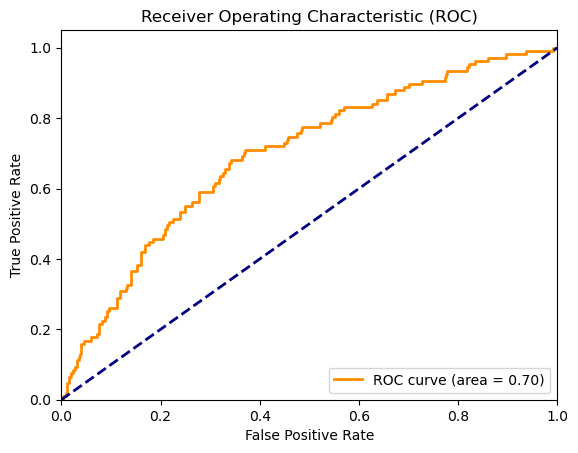

In [6]:
# Classification of subgroup 1 and TC
SVM(x1, y1, kernel = kernel, C=1)



Optimal decision threshold: 0.30
Precision: 0.44
Recall: 0.71
Balanced accuracy: 0.65
Accuracy: 0.63
ROC AUC: 0.69


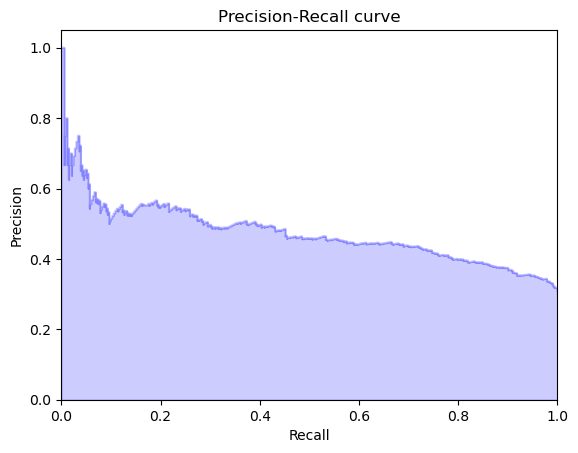

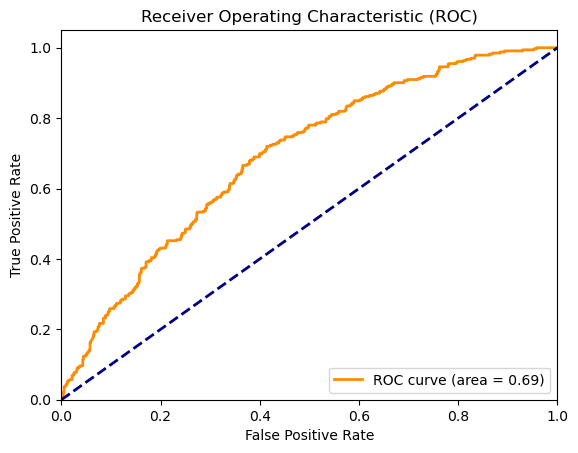

In [7]:
# Classification of subgroup 2 and TC

SVM(x2, y2, kernel = kernel, C=1)
